In [6]:
from google.colab import files
uploaded=files.upload()

Saving test.csv to test (1).csv


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('test.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ------------

In [9]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values in 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values in 'Fare' with median
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Fill missing values in 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column as it has too many missing values
df.drop('Cabin', axis=1, inplace=True)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
# Convert 'Sex' to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numerical
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

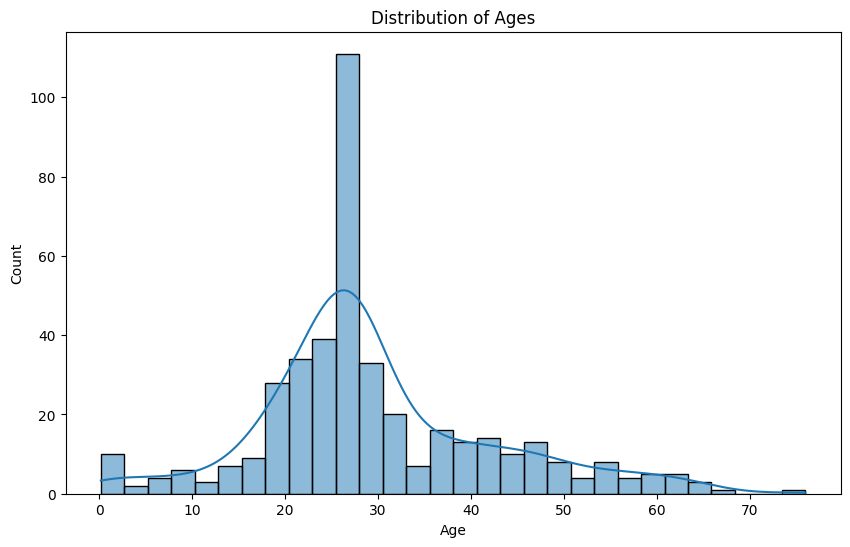

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

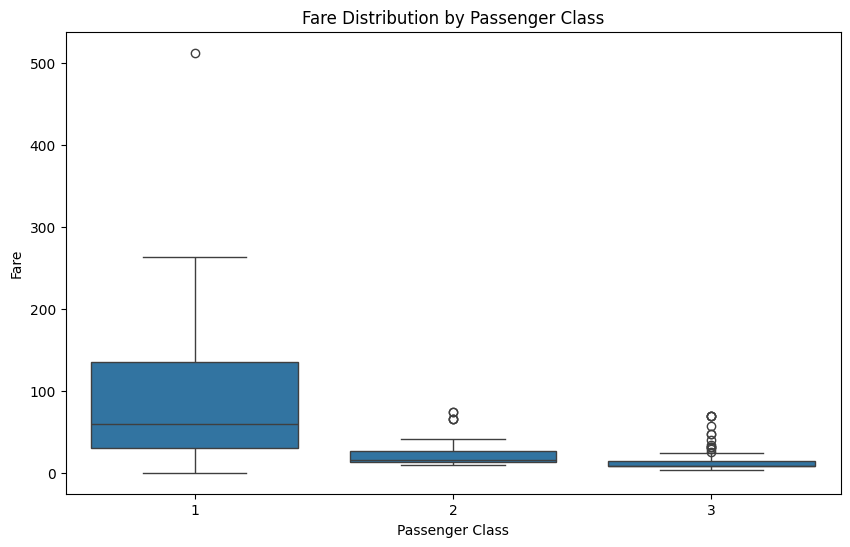

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

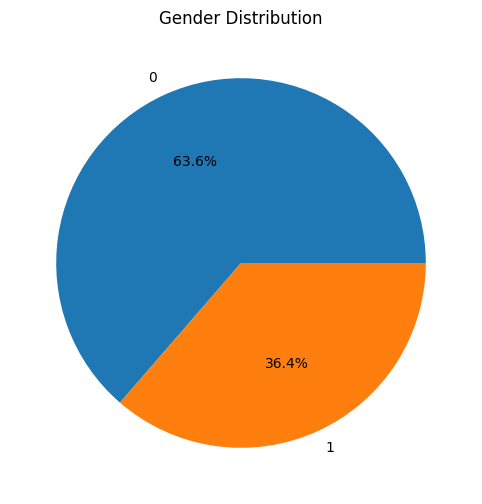

In [13]:
plt.figure(figsize=(8, 6))
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

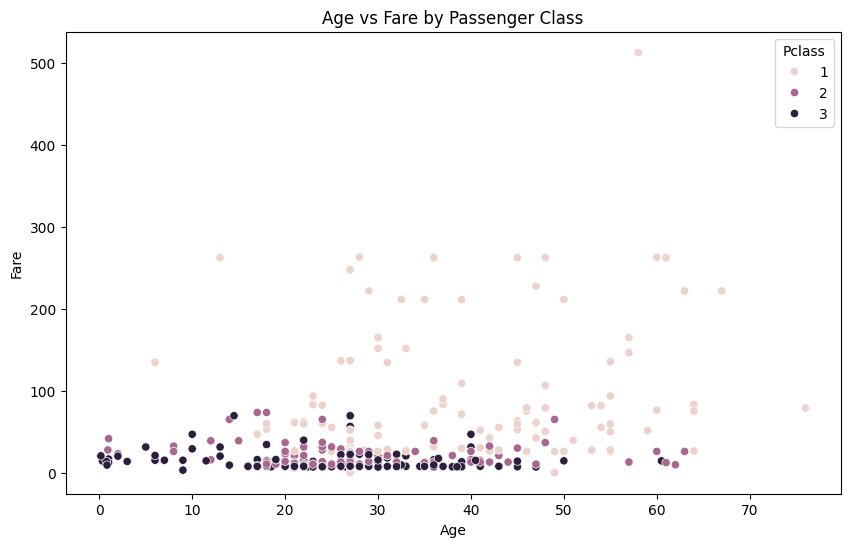

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=df)
plt.title('Age vs Fare by Passenger Class')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

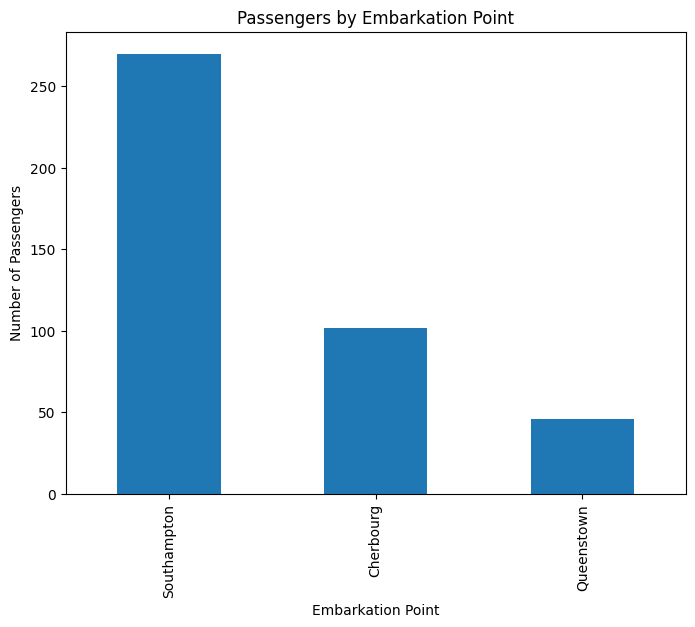

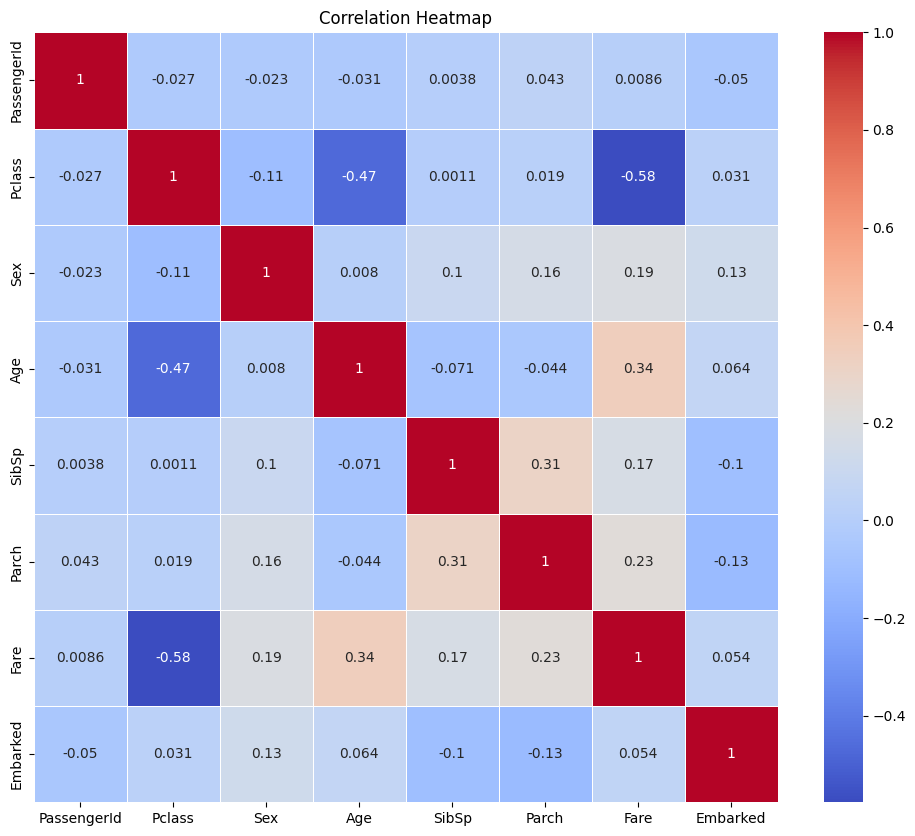

In [15]:
plt.figure(figsize=(8, 6))
df['Embarked'].value_counts().plot(kind='bar')
plt.title('Passengers by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown'])
plt.show()


# Select numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()